In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [184]:
# Data from Feb 22 to August 3rd
cases = pd.read_csv("cases_ccvi.csv")


In [185]:
# categorize vulnerability into 3 categories low(<0.35) medimum(0.35<<0.65) high >0.65
def vulnerabilty(x):
    if x <= 0.35:
        y='low'
    elif x > 0.65:
        y='high'
    else:
        y='med'
    return y

In [186]:
cases.loc[:,'vul'] = cases.apply(lambda x: vulnerabilty(x['CCVI']),axis=1)
cases_clean = cases.drop(['countyFIPS','County Name','State','stateFIPS'],axis=1)

# Group counties based on vulnerability level (low-med-high)
df= cases_clean.groupby(['vul']).sum()
df = df.drop(['CCVI'],axis=1)

# standardize cases per 100,000 in each category
df.iloc[:,:-1] = df.iloc[:,:-1].div(df.population,axis =0).mul(100000,axis=0)
df = df.drop(['population'],axis=1)
df= df.transpose()
df['date'] = df.index

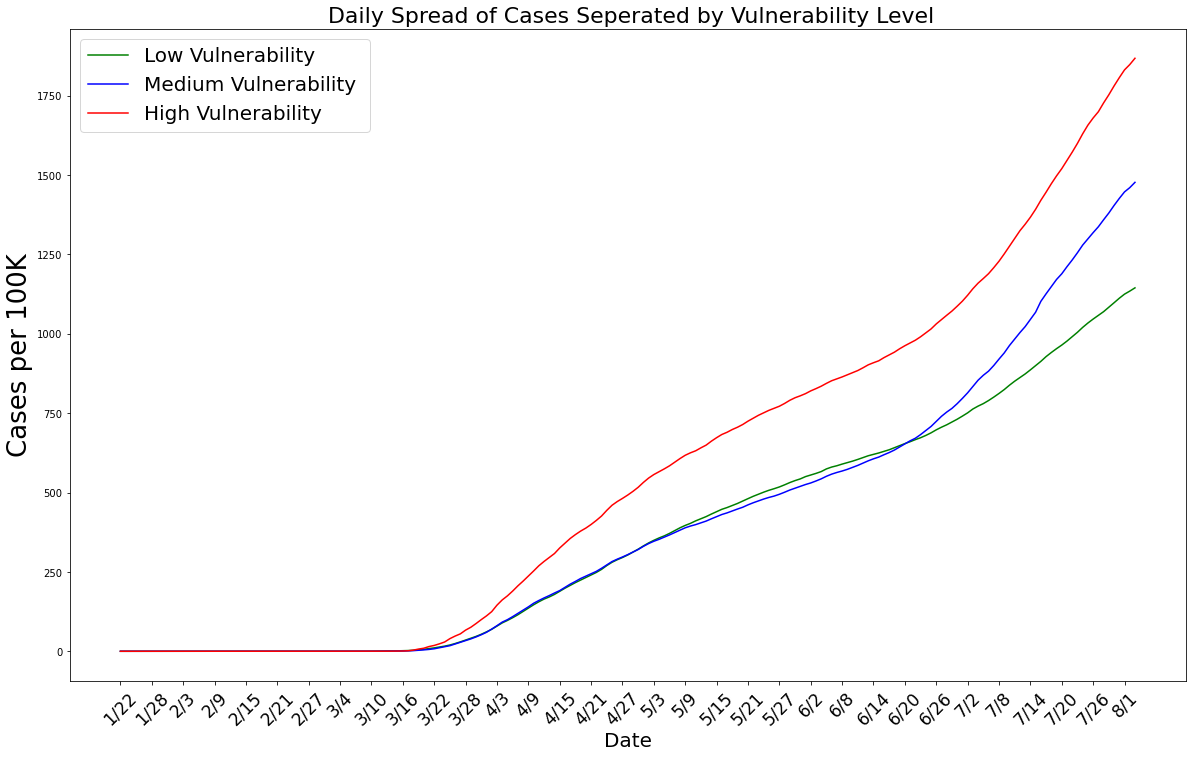

In [252]:
# plotting
fig=plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
#plot
ax.plot('date','low',data=df,color='green',label="Low Vulnerability")
ax.plot('date','med',data=df,color='blue',label="Medium Vulnerability ")
ax.plot('date','high',data=df,color='red', label="High Vulnerability")
ax.legend(fontsize=20)

#decorate
plt.xlabel('Date',fontsize=20)
plt.title(' Daily Spread of Cases Seperated by Vulnerability Level',fontsize=22)
plt.ylabel('Cases per 100K',fontsize=26)
# adjusting for xticks
dates = df['date']
days = len(dates)
ticks = [dates[i] for i in range(0,days,6)]
labels = [ticks[i][:-5] for i in range(len(ticks))]
plt.xticks(ticks,labels,rotation=45,fontsize=17)


plt.show()

In [237]:
dates = df['date']

In [240]:
days = len(dates)

In [241]:
ticks = [dates[i][:-5] for i in range(0,days,6)]

In [243]:
ticks[6]

'2/27'

In [191]:
#df = df.melt('date', var_name='vulnerability',  value_name='Cases per 100k')

#plt.figure(figsize=(12,12))
#g = sns.catplot(x="date", y="Cases per 100k", hue='vulnerability', data=df, kind='point')
#plt.show()#